## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [30]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
%matplotlib inline 

# import os
# import warnings
# warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv('Mall_Customers.csv')

customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
customer_set.head(1)

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.

In [4]:
print("Вибірка:", customer_set.columns)

print("Розмірність датасету:", customer_set.shape)

print("\nОсновна статистична інформацію по числовим змінним:")
print(customer_set.describe())

print("\nПеревірка на наявність NaN:")
print(customer_set.isnull().sum())



Вибірка: Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')
Розмірність датасету: (200, 5)

Основна статистична інформацію по числовим змінним:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Перевірка на наявність NaN:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [5]:
customer_set.drop('CustomerID', axis=1, inplace=True)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

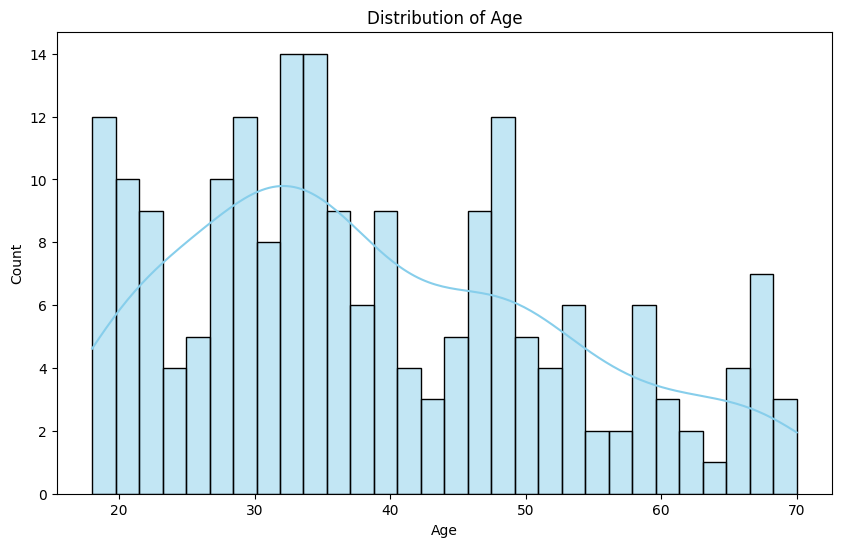

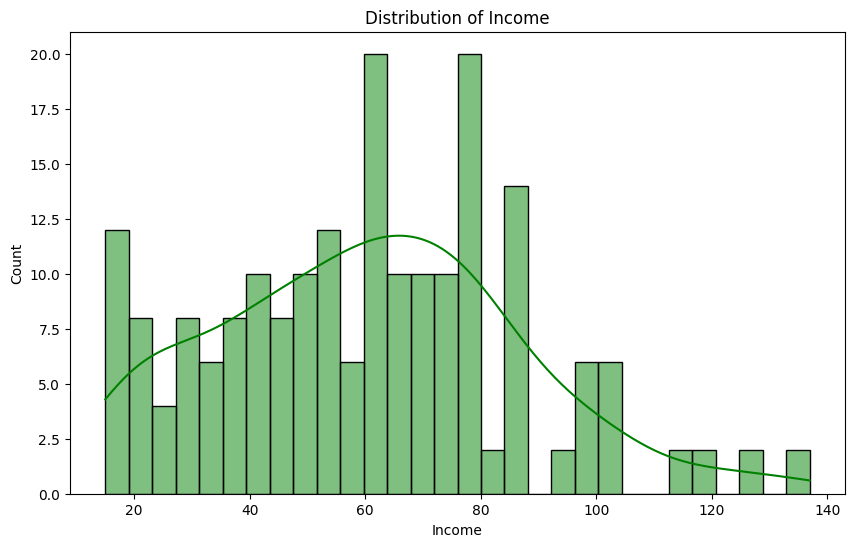

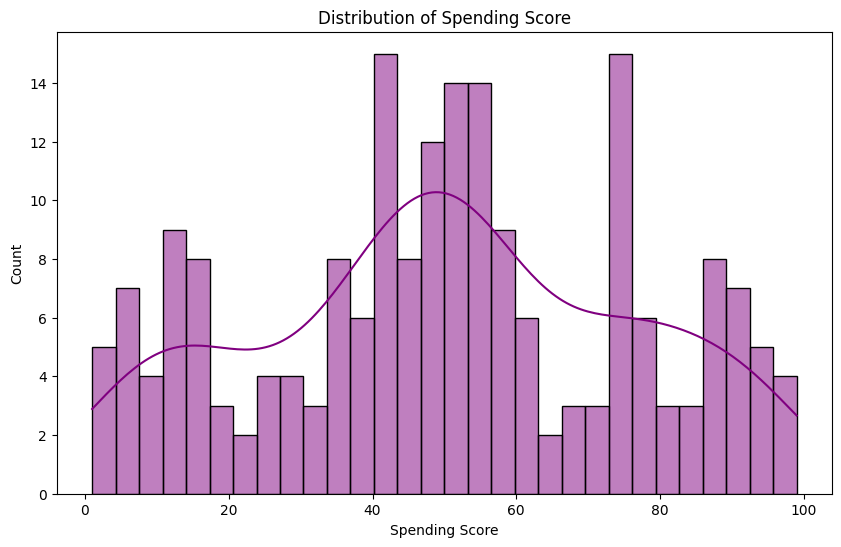

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', bins=30, kde=True, color='green')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', bins=30, kde=True, color='purple')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Count')

plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

e:\Python\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(
e:\Python\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(
e:\Python\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(


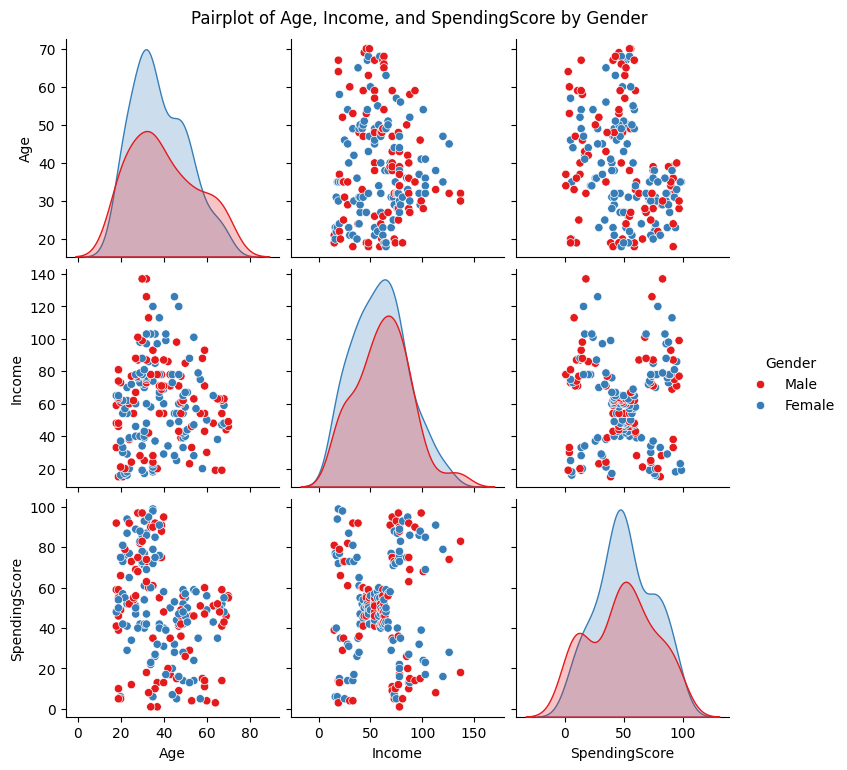

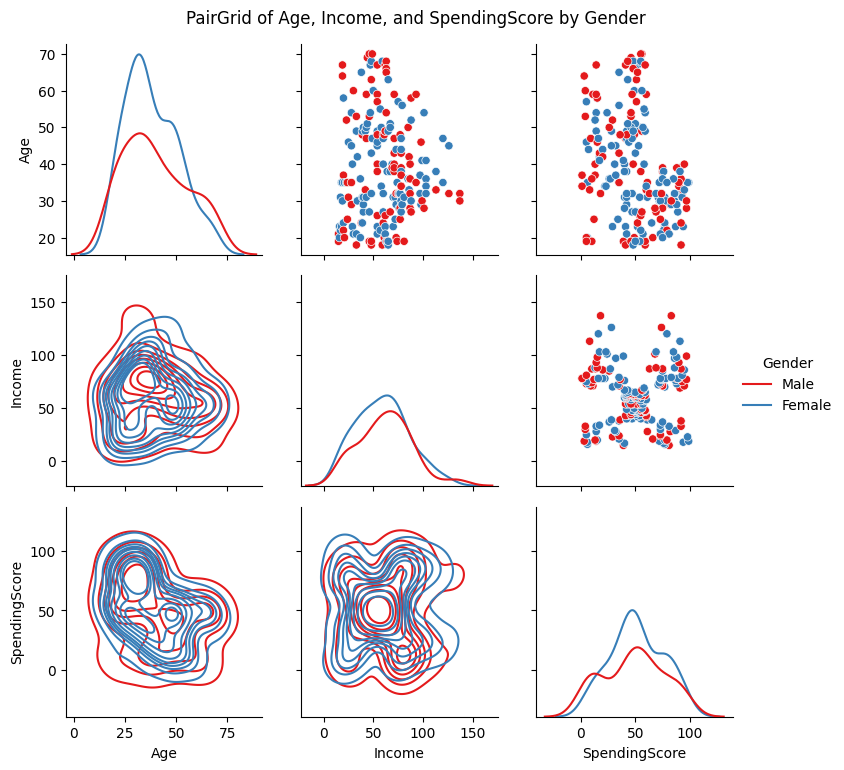

In [7]:
sns.pairplot(customer_set, hue='Gender', palette='Set1')
plt.suptitle('Pairplot of Age, Income, and SpendingScore by Gender', y=1.02)

g = sns.PairGrid(customer_set, hue='Gender', palette='Set1')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend(title='Gender')
plt.suptitle('PairGrid of Age, Income, and SpendingScore by Gender', y=1.02)

plt.show()


**Висновки з 1-4 завдання (детальні)**

1. Завдання 1: 
    - Перевірив наявність атрибутів у вибірці, які включають CustomerID, Gender, Age, Income, SpendingScore.
    - Перевірив розмірність датасету за допомогою customer_set.shape. (200, 5)
    - Використав метод describe() щоб вивести основну статистичну інформацію.
    - Використав метод isnull().sum(), не має пропущених значень.
    
2. Завдання 2:
    - Видалив змінну CustomerID, оскільки вона є тільки ідентифікатором клієнта і не впливає на аналіз даних.

3. Завдання 3:
    - Діаграма розподілу для змінної Age:
        - Графік показує розподіл віку клієнтів магазину.
        - Найбільша кількість осіб спостерігається у віковій групі близько 40 років.
        - Існує тенденція до зменшення кількості осіб у молодших та старших вікових групах.

    - Діаграма розподілу для змінної Income:
        - Графік показує розподіл річного доходу клієнтів магазину.
        - Найбільша кількість осіб має дохід близько 60 та 80 одиниць.
        - Існує тенденція до зменшення кількості осіб з вищими та нижчими рівнями доходу.
        
    - Діаграма розподілу для змінної SpendingScore:
        - Графік показує розподіл рівня витрат клієнтів магазину.
        - Більша кількість людей з балами витрат знаходяться близько 40 та трохи вище 80.
        - Розподіл не є рівномірним.

4. Завдання 4:
    - Скотерплот 1:
        - Розподіл Віку: Серед клієнтів магазину більше молодих жінок, ніж чоловіків. Розподіл віку серед чоловіків є більш рівномірним.
        - Розподіл Доходу: Розподіл доходів між статями є схожим, але з невеликими відмінностями у середньому діапазоні доходів.
        - Розподіл Рівня Витрат: Жінки, як правило, мають вищий рівень витрат, ніж чоловіки, що вказує на потенційно більшу активність жінок у покупках.
    - Скотерплот 2:
        - Розподіл Віку: Графік показує, що більшість клієнтів мають вік від 20 до 40 років, з невеликим спадом кількості клієнтів у віковій групі 40+.
        - Розподіл Доходу: Дохід клієнтів варіюється від низького до високого, з піком у середньому доходовому сегменті. Жінки та чоловіки мають схожий розподіл доходів.
        - Розподіл Рівня Витрат: Більшість клієнтів мають середній рівень витрат. Розподіл рівня витрат серед жінок та чоловіків є схожим.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender
Female    112
Male       88
Name: count, dtype: int64


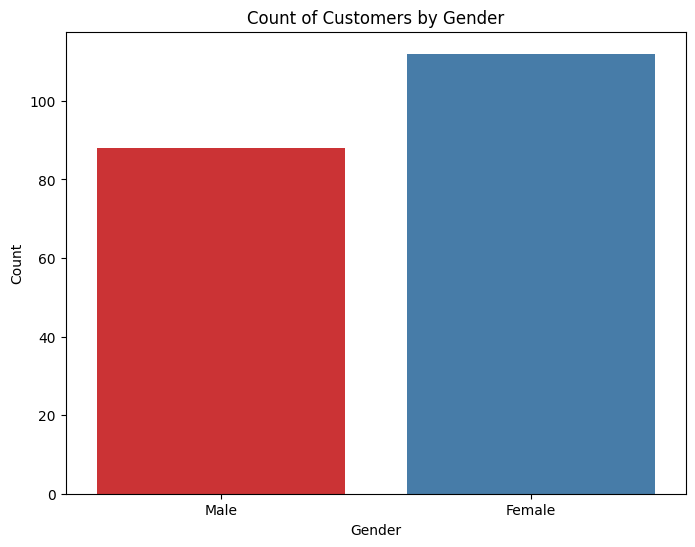

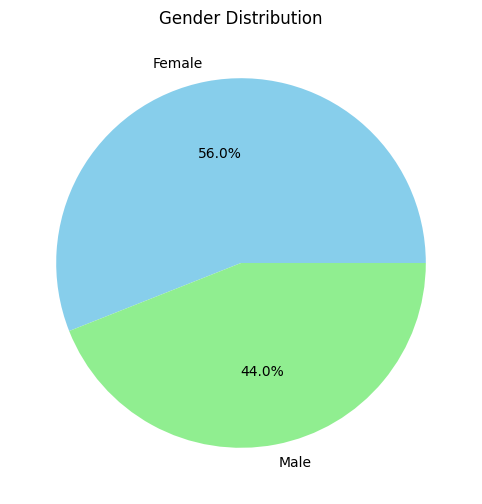

In [8]:
gender_counts = customer_set['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Gender', data=customer_set, palette='Set1', legend=False)
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

gender_labels = gender_counts.index
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')

plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

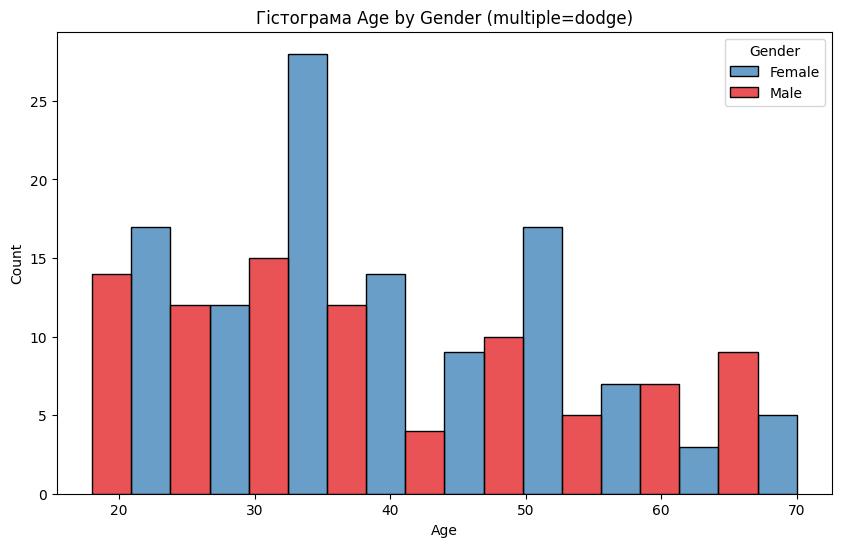

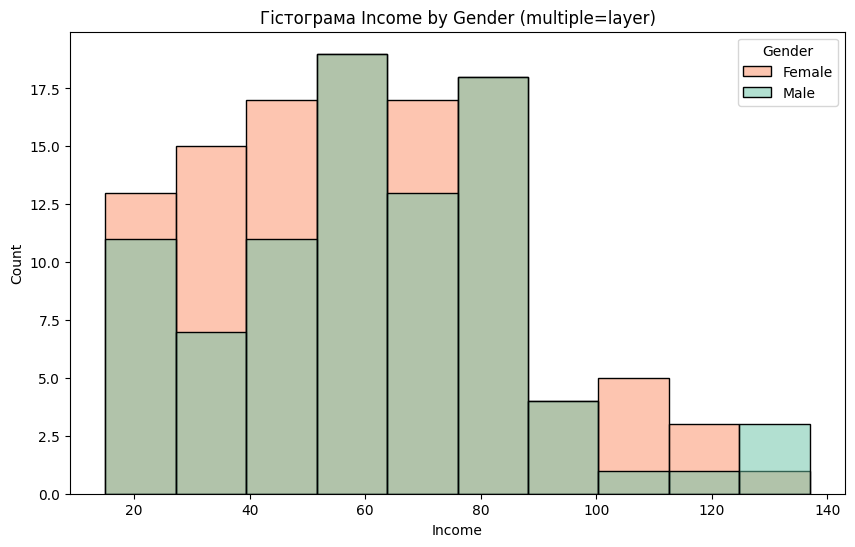

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', palette='Set1', legend=False)
plt.title('Гістограма Age by Gender (multiple=dodge)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', palette='Set2', legend=False)
plt.title('Гістограма Income by Gender (multiple=layer)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



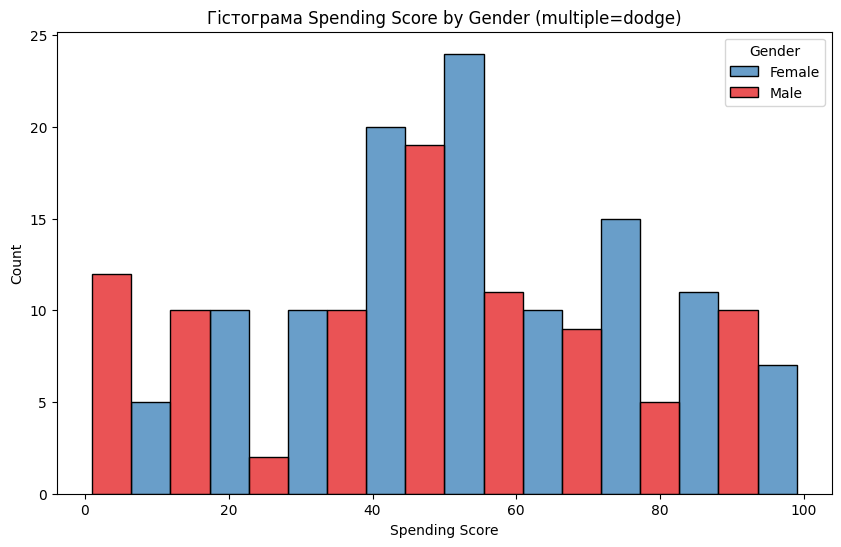

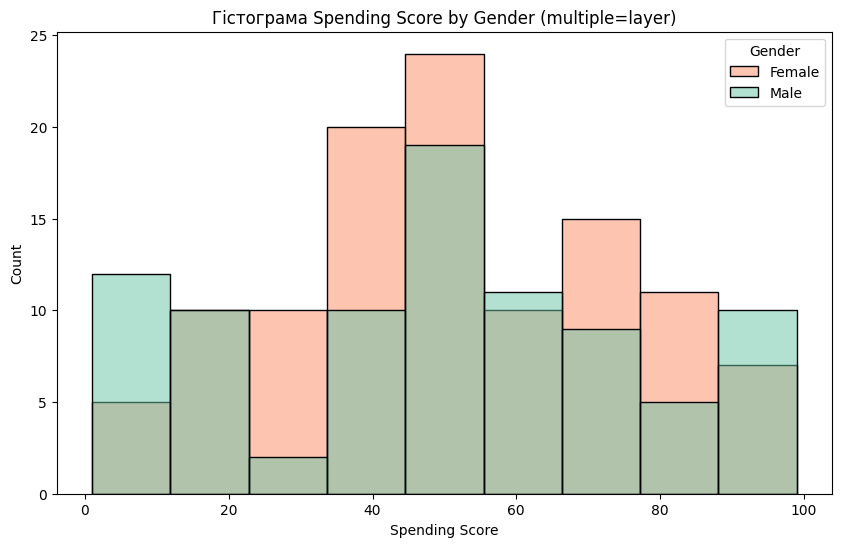

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', palette='Set1', legend=False)
plt.title('Гістограма Spending Score by Gender (multiple=dodge)')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', palette='Set2', legend=False)
plt.title('Гістограма Spending Score by Gender (multiple=layer)')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

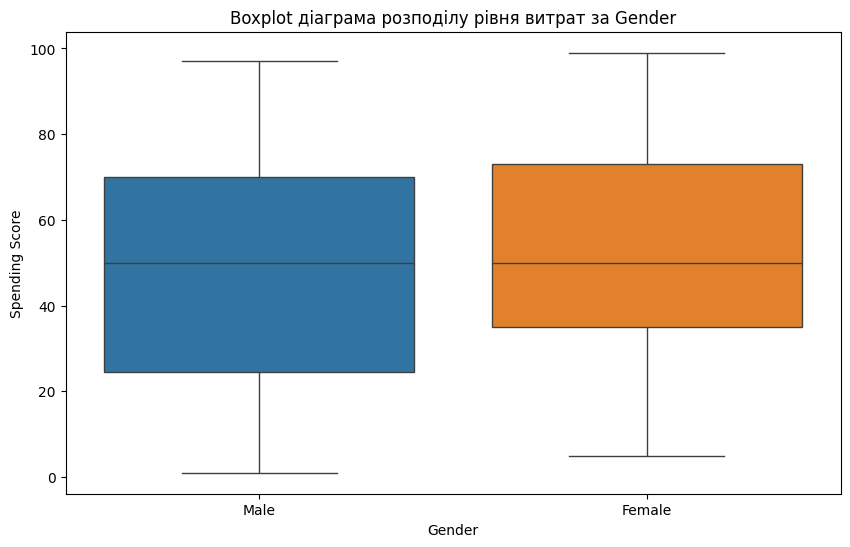

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='SpendingScore', hue='Gender', data=customer_set, legend=False)
plt.title('Boxplot діаграма розподілу рівня витрат за Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.  - Яке співвідношення груп чоловіків та жінок?
        - Жінок 112 - 56%, чоловіків 88 - 44%.
2.  - Подивитись які можна виділити групи і як розподілені витрати відностно статі людини?  
        - Чоловіки (зелений колір): Переважають у нижчих до середніх діапазонах доходів (20-80).
          - Мають менший міжквартильний розмах витрат.

        - Жінки (рожевий колір): Мають значну присутність у середньому діапазоні доходів (60) та переважають у вищому діапазоні доходів (100).
          - Показують трохи вищу медіану витрат та більший міжквартильний розмах.
        
3.  - Чи є різниця між витратами у чоловіків та жінок?
        - Чоловіки: Мають менший міжквартильний розмах витрат, з медіаною близько 50.
        - Жінки: Показують трохи вищу медіану витрат та більший міжквартильний розмах.
        - Жінки, як правило, мають більший розкид витрат порівняно з чоловіками.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

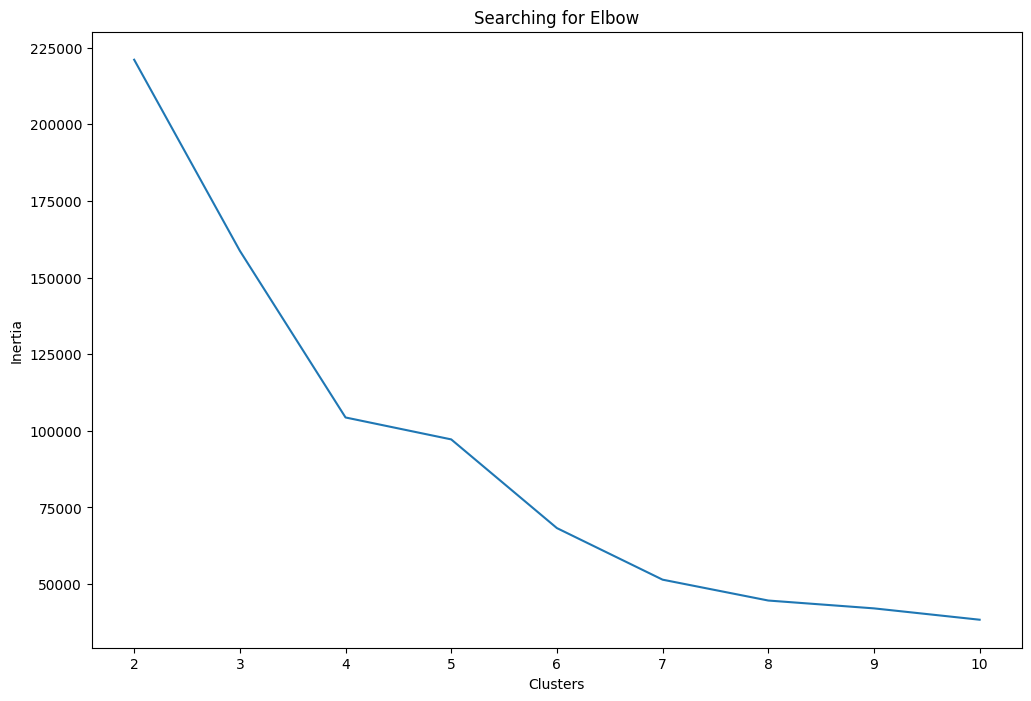

In [16]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

min_clusters = 2
max_clusters = 10 

for i in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters+1)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.xticks(np.arange(min_clusters, max_clusters+1, 1))


plt.show()

**Висновки з завдання 9 (детальні)** 

1.  - Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
        - На основі графіка зображенно оптимальна кількість кластерів 4. Це те місце на графіку, де крива різко змінює нахил.
        - Якщо додати ще 1 то це не призведе до значного покращення якості кластеризації.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

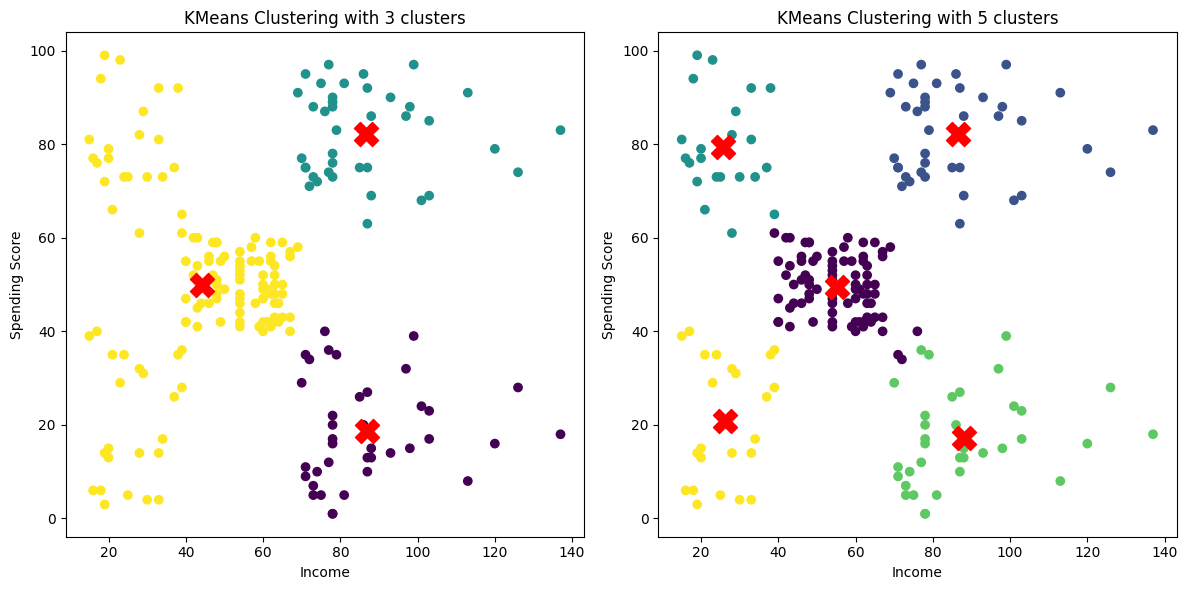

In [17]:
k_clusters = [3, 5]  # Вибрані кількості кластерів
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for idx, k in enumerate(k_clusters):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[['Income', 'SpendingScore']])

    # Візуалізація кластерів
    axs[idx].scatter(X['Income'], X['SpendingScore'], c=kmeans.labels_, cmap='viridis')
    axs[idx].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
    axs[idx].set_title(f'KMeans Clustering with {k} clusters')
    axs[idx].set_xlabel('Income')
    axs[idx].set_ylabel('Spending Score')
    
plt.tight_layout()
plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

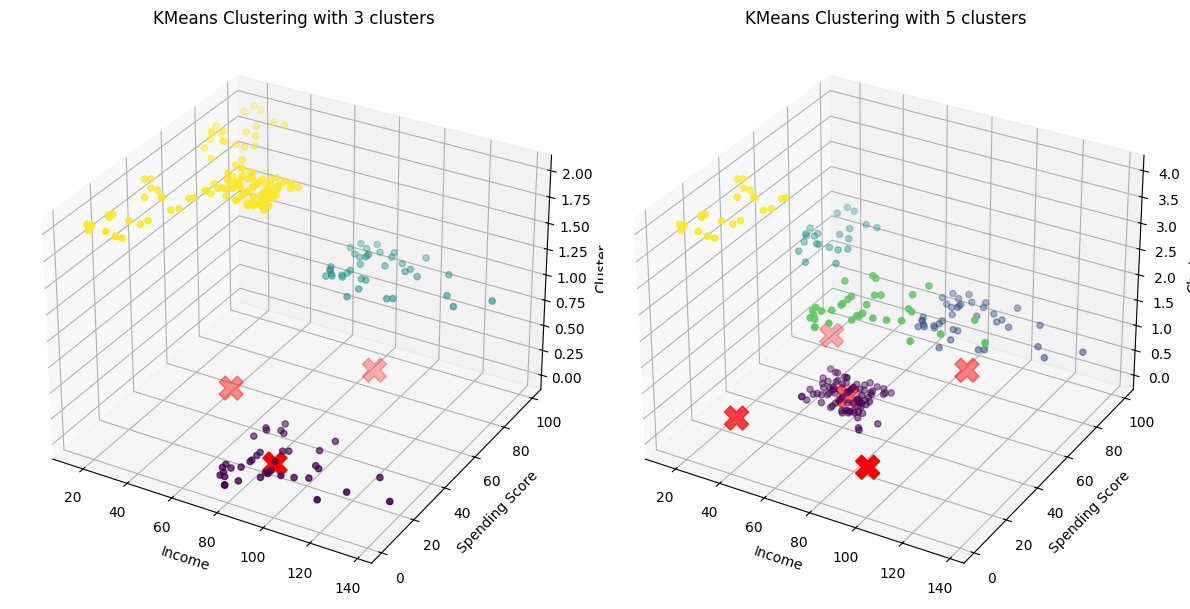

In [29]:
k_clusters = [3, 5]

fig = plt.figure(figsize=(12, 6))

for idx, k in enumerate(k_clusters):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[['Income', 'SpendingScore']])

    ax = fig.add_subplot(1, 2, idx+1, projection='3d')
    ax.scatter(X['Income'], X['SpendingScore'], kmeans.labels_, c=kmeans.labels_, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0] * len(kmeans.cluster_centers_), s=300, c='red', marker='X')
    ax.set_title(f'KMeans Clustering with {k} clusters')
    ax.set_xlabel('Income')
    ax.set_ylabel('Spending Score')
    ax.set_zlabel('Cluster')

plt.tight_layout()
plt.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2. Завдання 10 - 11:
    - оптимальною кількістю кластерів є 5.
    - Кластер 1: Може представляти осіб з високим доходом та високим рівнем витрат.
    - Кластер 2: Імовірно, включає осіб з середнім доходом та середнім рівнем витрат.
    - Кластер 3: Складається з осіб з низьким доходом, але високим рівнем витрат.
    - Кластер 4: Може містити осіб з високим доходом, але низьким рівнем витрат.
    - Кластер 5: Включає осіб з низьким доходом та низьким рівнем витрат.


## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


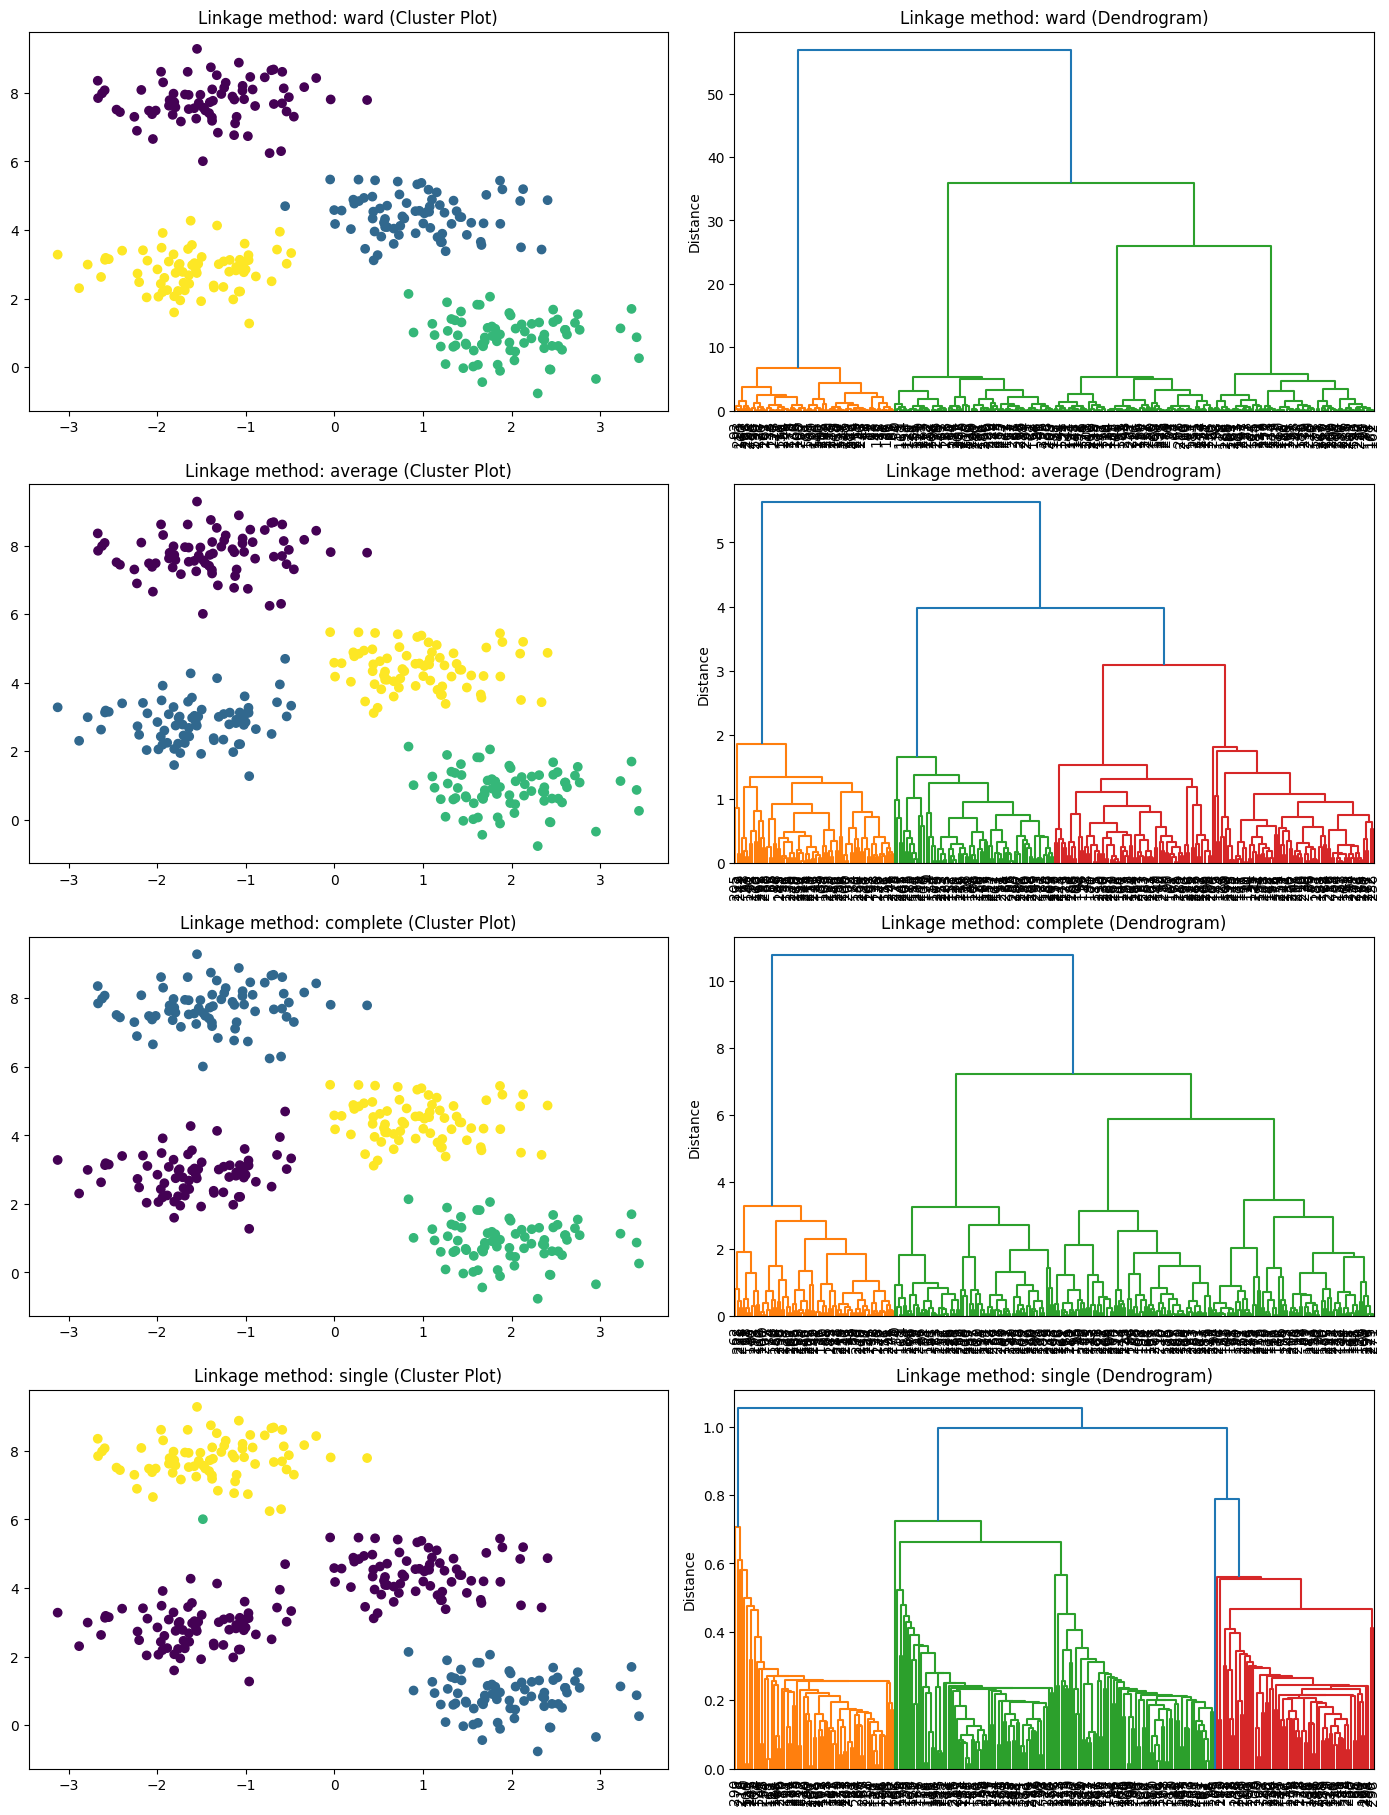

In [36]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

n_clusters = 4 
linkage_methods = ['ward', 'average', 'complete', 'single']

plt.figure(figsize=(14, 36))

for idx, linkage in enumerate(linkage_methods, 1):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    clustering.fit(X)
    
    plt.subplot(8, 2, idx*2-1) 
    plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
    plt.title(f'Linkage method: {linkage} (Cluster Plot)')
    
    plt.subplot(8, 2, idx*2)
    distance_matrix = hierarchy.linkage(X, method=linkage)
    dn = hierarchy.dendrogram(distance_matrix, leaf_font_size=10)
    plt.title(f'Linkage method: {linkage} (Dendrogram)')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

**Висновки з завдання 12 (детальні)**

1. Ward: Цей Метод призводить до створення 4 кластерів. Кластери чітко розділені та мають схожі форми та розміри.
    - 4 кластери були створені послідовним об'єднанням менших кластерів.
2. Average: Цей Метод призводить до створення 4 кластерів. Кластери чітко розділені, але мають більш різні форми та розміри, ніж кластери, створені методом Ward.
    - 4 кластери були створені послідовним об'єднанням менших кластерів.
3. Complete: Цей Метод призводить до створення 3 кластерів. Кластери чітко розділені, але один із кластерів значно більший, ніж інші два.
    - 3 кластери були створені послідовним об'єднанням менших кластерів.
4. Single: Цей Метод призводить до створення 2 кластерів. Два кластери чітко розділені, але один із кластерів значно більший, ніж інший.
    - 2 кластери були створені послідовним об'єднанням менших кластерів.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

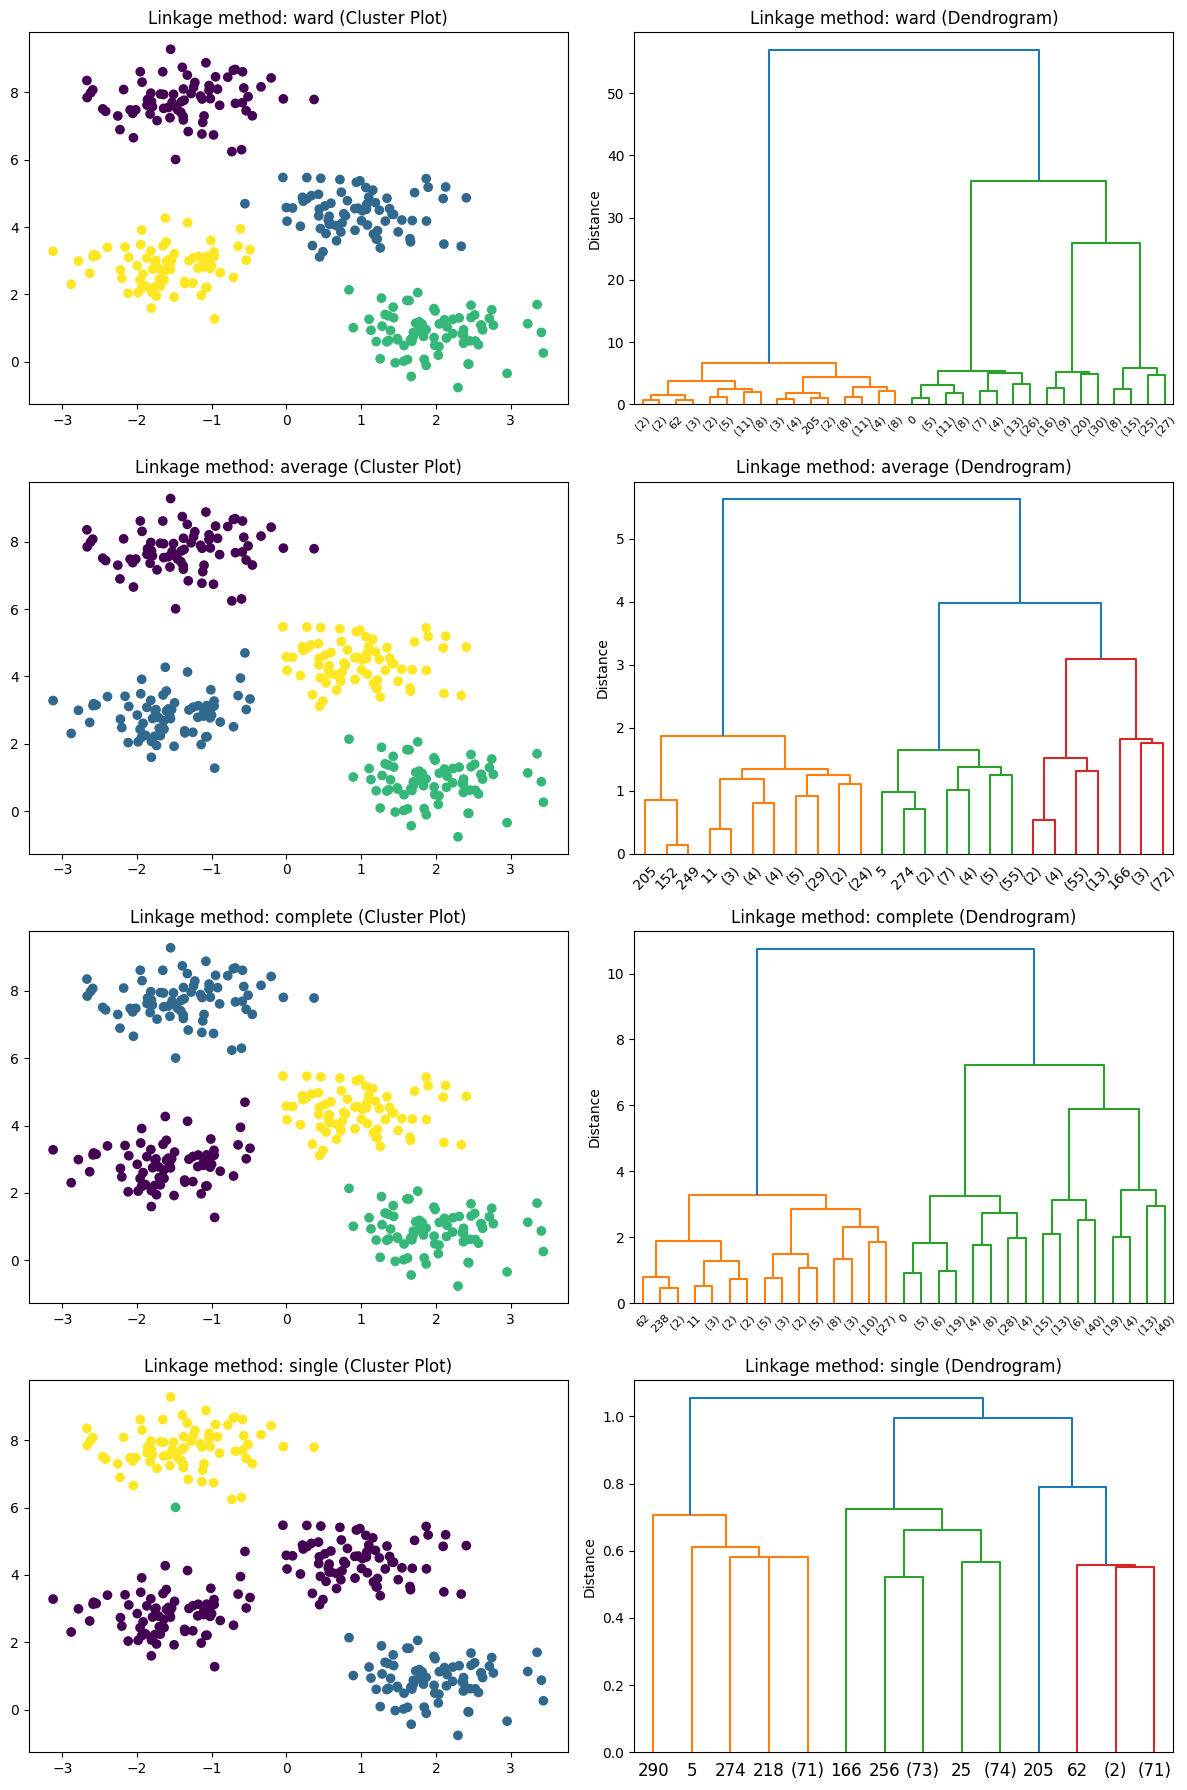

In [37]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

n_clusters = 4

linkage_methods = ['ward', 'average', 'complete', 'single']

plt.figure(figsize=(12, 18))

for idx, linkage in enumerate(linkage_methods, 1):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    clustering.fit(X)
    
    plt.subplot(4, 2, idx*2-1)
    plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
    plt.title(f'Linkage method: {linkage} (Cluster Plot)')
    
    plt.subplot(4, 2, idx*2)
    distance_matrix = hierarchy.linkage(X, method=linkage)
    dn = hierarchy.dendrogram(distance_matrix, truncate_mode='level', p=n_clusters)
    plt.title(f'Linkage method: {linkage} (Dendrogram)')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

**Висновки з завдання 13 (детальні)**

1. На мою думку, оптимальна кількість кластерів для даних становить 4. Ця кількість чітко простежується на дендрограмах усіх методів, де на рівні 4 спостерігається різке зменшення зв'язків між кластерами.
2. Загалом, всі 4 методи дають схожу картину кластеризації даних. Однак метод Ward, дає найбільш чітку та інформативну візуалізацію кластерів.